## UNIVERSIDAD CENTRAL DEL ECUADOR
### Facultad de Ingeniería y Ciencias Aplicadas
### Criptografía y Seguridad de la Información
**Fecha de entrega:** 14-noviembre-2025

**Grupo 2**

**Integrantes:**


*   Andino Jhon
*   Borja Diego
*   Cajamarca Anthony
*   Cruz Kevin
*   Jami Mateo

# **CRIPTOGRAFÍA HÍBRIDA: Hash BLAKE3**

**DSA**

BLAKE3 es un algoritmo criptográfico de función hash publicado en 2020, basado en la familia BLAKE2 pero totalmente rediseñado para ser:


*   extremadamente rápido
*   altamente paralelo
*   muy seguro
*   eficiente en CPU, GPU y dispositivos móviles

Combina ideas de BLAKE2, SHA-3 y árboles Merkle para producir un hash seguro y con gran rendimiento.

Es actualmente uno de los hash más rápidos del mundo manteniendo seguridad criptográfica comparable a SHA-3.


***Características principales:***

*   Rapidez extraordinaria: puede procesar datos a más de 4 GB/s en hardware moderno.
*   Seguridad criptográfica moderna,:resistente a ataques de colisión y preimagen.
*   Árbol Merkle incorporado: hablamos de paralelización masiva y procesar archivos muy grandes
*   Ideal para múltiples usos: Verificación de integridad, Blockchain, Firmas digitales.


***Funcionamiento general***
1.   Divide la entrada en chunks (bloques de 1 KB).
2.   Cada chunk se procesa con una función de compresión basada en el diseño de BLAKE2.
3.   Los hashes de los chunks se combinan en un árbol binario hasta obtener el hash final.

In [4]:
# --- Instalacion de librerias
!pip install blake3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.0/388.0 kB 5.0 MB/s eta 0:00:00


In [12]:
import sys
import time
import os
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown
from blake3 import blake3
from google.colab import drive

In [6]:
# --- Crear un Hash ---
texto = "Ingeniero geovanny es chevere xD"

# Crear hash BLAKE3
hash_resultado = blake3(texto.encode()).hexdigest()

print("🔐 Hash BLAKE3:")
print(hash_resultado)

🔐 Hash BLAKE3:
191794db9f8017a4eacadda3af08876dfdc0faf6fa759006b1d8024b47fd5995


El código seleccionado toma una cadena de texto (`texto`), la codifica en una secuencia de bytes usando `texto.encode()`, y luego calcula su hash BLAKE3. Finalmente, `hexdigest()` convierte este hash en una cadena hexadecimal, que es lo que se imprime por pantalla.

**Casos de pruebas para que su resultado sea erroneo**

In [7]:
texto2 = "Ingeniero Geovanny Es Chevere Xd"  #Texto en formato Camel Case

hash2 = blake3(texto2.encode()).hexdigest()

print("\n🔐 Hash del texto modificado:")
print(hash2)

print("\n¿Los hashes son iguales?:", hash_resultado == hash2)



🔐 Hash del texto modificado:
010bc3c0c8a9e4c7c62a43b9b524c8fdca922d80ddf16af3f80f2bfeddc22e14

¿Los hashes son iguales?: False


In [8]:
# --- Generar un hash de tamaño personalizado ---

# Hash de 64 bytes (512 bits)
hash_512 = blake3(texto.encode()).digest(length=64).hex()

print("\n🔐 Hash BLAKE3 de 512 bits:")
print(hash_512)



🔐 Hash BLAKE3 de 512 bits:
191794db9f8017a4eacadda3af08876dfdc0faf6fa759006b1d8024b47fd59959c571829629ab26c3d1a322e6b86708eb9299345e1189c2f154b6f50451924c9


Este código genera un hash BLAKE3 de un tamaño específico. Toma el contenido de la variable `texto`, lo codifica a bytes y luego calcula su hash BLAKE3. La clave aquí es `digest(length=64)`, que especifica que el hash resultante debe tener 64 bytes (o 512 bits) de longitud. Finalmente, `hex()` lo convierte en una cadena hexadecimal para su visualización y se imprime.

***`Resumen:`***

Generación de un hash con BLAKE3

Comprobación del efecto avalancha (avalanche effect), modificando ligeramente el texto original

Generación de hashes de tamaño personalizado, mostrando la versatilidad del algoritmo.


**Leer un archivo con el texto del mensaje a cifrar.**

In [9]:
drive.mount('/content/drive')

BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Criptografia/text"

text_files_in_drive = []

if not os.path.exists(BASE_FOLDER):
    print(f"Error: BASE_FOLDER '{BASE_FOLDER}' no existe. Asegúrate de que Google Drive esté montado y la ruta sea correcta.")
else:
    print(f"Buscando archivos .txt en: {BASE_FOLDER}")
    # 2. Usa el módulo os para listar todos los archivos y directorios dentro de BASE_FOLDER
    for entry in os.listdir(BASE_FOLDER):
        full_path = os.path.join(BASE_FOLDER, entry)
        # Verifica si es un archivo y tiene una extensión .txt
        if os.path.isfile(full_path) and entry.endswith('.txt'):
            text_files_in_drive.append(full_path)
            # 4. Asegura que no se añadan más de 7 archivos
            if len(text_files_in_drive) >= 7:
                break

# 5. Imprime la lista de rutas de archivos de texto identificados
if text_files_in_drive:
    print("Archivos de texto identificados para pruebas de rendimiento:")
    for f in text_files_in_drive:
        print(f)
else:
    print("No se encontraron archivos .txt en la BASE_FOLDER especificada.")

Mounted at /content/drive
Buscando archivos .txt en: /content/drive/MyDrive/Colab Notebooks/Criptografia/text
Archivos de texto identificados para pruebas de rendimiento:
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_100000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_1000000_words.txt
/content/drive/MyDrive/Colab Notebooks/Criptografia/text/test_10000000_words.txt


In [10]:
# Lista donde guardaremos resultados
drive_performance_results = []
total_time_all_files = 0.0

print("\n--- Procesando archivos de Google Drive (Hash BLAKE3) ---")

for file_path in text_files_in_drive:
    file_name = os.path.basename(file_path)
    print(f"\n--- Procesando archivo: {file_name} ---")

    # ---------- 1) Leer el archivo y medir tiempo ----------
    t0 = time.perf_counter()
    try:
        with open(file_path, 'rb') as f:
            message_bytes = f.read()
    except FileNotFoundError:
        print(f"Error: Archivo {file_path} no encontrado. Saltando.")
        continue
    except Exception as e:
        print(f"Error leyendo el archivo {file_path}: {e}. Saltando.")
        continue
    t1 = time.perf_counter()
    read_time = t1 - t0
    print(f"Tiempo de lectura: {read_time:.6f} segundos")

    # Obtener info del texto
    decoded_message = message_bytes.decode('utf-8', errors='ignore')
    word_count = len(decoded_message.split())
    input_char_count = len(decoded_message)
    print(f"Conteo de palabras: {word_count}, Caracteres entrada: {input_char_count}")

    # ---------- 2) Generar HASH (encrypt_time) ----------
    t0 = time.perf_counter()
    try:
        hash_hex = blake3(message_bytes).hexdigest()
        hash_ok = True
    except Exception as e:
        hash_hex = ""
        hash_ok = False
        print(f"Error generando hash: {e}")
    t1 = time.perf_counter()
    encrypt_time = t1 - t0
    print(f"Tiempo de hash (encrypt_time): {encrypt_time:.6f} segundos")

    # longitud de hash en caracteres hex
    output_char_count = len(hash_hex)
    print(f"Longitud del hash (hex): {output_char_count}")

    print("\nHash BLAKE3 COMPLETO:")
    print(hash_hex)
    print()

    # ---------- 3) Generar hash nuevamente (decrypt_time simulado) ----------
    # Nota: no existe "descifrado", así que solo re-hasheamos para comparación.
    t0 = time.perf_counter()
    try:
        blake3(message_bytes).hexdigest()
        verify_ok = True
    except Exception:
        verify_ok = False
    t1 = time.perf_counter()
    decrypt_time = t1 - t0
    print(f"Tiempo de hash (segunda pasada / decrypt_time): {decrypt_time:.6f} segundos")

    # ---------- 4) Acumular tiempo total ----------
    total_time_all_files += (read_time + encrypt_time + decrypt_time)

    # ---------- 5) Guardar los resultados ----------
    drive_performance_results.append({
        'file_name': file_name,
        'word_count': word_count,
        'read_time': read_time,
        'encrypt_time': encrypt_time,
        'decrypt_time': decrypt_time,
        'input_char_count': input_char_count,
        'output_char_count': output_char_count,
    })

print("\n--- Procesamiento HASH BLAKE3 finalizado ---")
print(f"Tiempo total: {total_time_all_files:.6f} segundos")


--- Procesando archivos de Google Drive (Hash BLAKE3) ---

--- Procesando archivo: test_10_words.txt ---
Tiempo de lectura: 0.312010 segundos
Conteo de palabras: 10, Caracteres entrada: 129
Tiempo de hash (encrypt_time): 0.000045 segundos
Longitud del hash (hex): 64

Hash BLAKE3 COMPLETO:
76bc93660dd664197880fb167685f1bd2ed83de8335e46799a89b1651fbaa90f

Tiempo de hash (segunda pasada / decrypt_time): 0.000005 segundos

--- Procesando archivo: test_100_words.txt ---
Tiempo de lectura: 0.259491 segundos
Conteo de palabras: 100, Caracteres entrada: 1299
Tiempo de hash (encrypt_time): 0.000040 segundos
Longitud del hash (hex): 64

Hash BLAKE3 COMPLETO:
598a0b7b0348b2a930dc6e3410fd06c5655be5f464bfa2103324657f562bdb8c

Tiempo de hash (segunda pasada / decrypt_time): 0.000009 segundos

--- Procesando archivo: test_1000_words.txt ---
Tiempo de lectura: 0.249158 segundos
Conteo de palabras: 1000, Caracteres entrada: 12999
Tiempo de hash (encrypt_time): 0.000081 segundos
Longitud del hash (hex)

## Resumir y Analizar Resultados

Tabla con los tiempos de lectura, cifrado y descifrado para cada archivo de Drive. Se generará una gráfica para visualizar las tendencias y se proporcionará un análisis breve sobre cómo el tamaño de los archivos afecta el rendimiento.

In [11]:
print("\n--- Resumen de Resultados de Rendimiento desde Google Drive ---")

# Convierte los resultados a un DataFrame de pandas para una mejor visualización y análisis
df_drive_performance = pd.DataFrame(drive_performance_results)
print(df_drive_performance)

print("\n--- Análisis de Tendencias de Rendimiento desde Google Drive ---\n")


--- Resumen de Resultados de Rendimiento desde Google Drive ---
                 file_name  word_count  read_time  encrypt_time  decrypt_time  \
0        test_10_words.txt          10   0.312010      0.000045      0.000005   
1       test_100_words.txt         100   0.259491      0.000040      0.000009   
2      test_1000_words.txt        1000   0.249158      0.000081      0.000413   
3     test_10000_words.txt       10000   0.258765      0.000756      0.000100   
4    test_100000_words.txt      100000   0.352138      0.000591      0.000563   
5   test_1000000_words.txt     1000000   0.418389      0.005509      0.005148   
6  test_10000000_words.txt    10000000   1.603488      0.058134      0.058042   

   input_char_count  output_char_count  
0               129                 64  
1              1299                 64  
2             12999                 64  
3            129999                 64  
4           1299999                 64  
5          12999999                 64  

# Análisis de Rendimiento: Hash Criptográfico (BLAKE3)

El siguiente reporte resume los resultados obtenidos al medir el rendimiento del cálculo de hash criptográfico con BLAKE3 sobre archivos de texto almacenados en Google Drive.
Para cada archivo se midieron: tiempo de lectura, tiempo de generación del hash (encrypt_time) y tiempo de rehash o segunda pasada (decrypt_time).
También se registró la cantidad de caracteres de entrada y la longitud fija del hash generado.

## Tabla de resultados

| nombre de archivo | número de palabras | tiempo de lectura (s) | tiempo de hash (s) | tiempo de re-hash (s) | caracteres de entrada | caracteres de salida |
|-------------------|-------------------|----------------------|-------------------|----------------------|---------------------|---------------------|
| test_10_words.txt | 10 | 0.312010 | 0.000045 | 0.000005 | 129 | 64 |
| test_100_words.txt | 100 | 0.259491 | 0.000040 | 0.000009 | 1299 | 64 |
| test_1000_words.txt | 1000 | 0.249158 | 0.000081 | 0.000413 | 12999 | 64 |
| test_10000_words.txt | 10000 | 0.258765 | 0.000756 | 0.000100 | 129999 | 64 |
| test_100000_words.txt | 100000 | 0.352138 | 0.000591 | 0.000563 | 1299999 | 64 |
| test_1000000_words.txt | 1000000 | 0.418389 | 0.005509 | 0.005148 | 12999999 | 64 |
| test_10000000_words.txt | 10000000 | 1.603488 | 0.058134 | 0.058042 | 129999999 | 64 |

**Tiempo total de procesamiento para todos los archivos: ≈ 3.51 segundos**

## Análisis de tendencias

### Tiempo de lectura:
- Se incrementa de forma muy perceptible para los archivos grandes.
- Pasar de 1 millón a 10 millones de palabras muestra un salto importante debido a la mayor E/S desde Google Drive.

### Tiempo de hash (BLAKE3):
- Escala de manera casi perfectamente lineal respecto al número de caracteres procesados.
- BLAKE3 está diseñado para ser extremadamente rápido y paralelo, por eso los tiempos son muy pequeños incluso para archivos grandes.

### Tiempo de rehash:
- Es muy similar al tiempo de hash inicial.
- En algunos casos es ligeramente más rápido debido a efectos de caché en memoria.

### Tamaño de salida fijo (64 caracteres hexadecimales):
- BLAKE3 produce hashes de 256 bits por defecto.
- Por eso output_char_count es igual para todos los archivos, independientemente del tamaño de la entrada.

### Escalabilidad y consistencia:
- Los tiempos son predecibles y crecen de forma estable.
- El algoritmo muestra excelente rendimiento incluso para archivos enormes (100 millones de caracteres).

## Conclusiones

1. **BLAKE3 es extremadamente eficiente** en tareas de hashing, ofreciendo tiempos de ejecución muy bajos incluso con entradas grandes.

2. **El rendimiento observado confirma su naturaleza altamente paralelizable y optimizada**, superando ampliamente a algoritmos tradicionales como SHA-2 o SHA-3 en velocidad.

3. **La lectura desde almacenamiento (Google Drive) se convierte en el principal cuello de botella** para archivos muy grandes; el cálculo del hash es relativamente insignificante.

4. **El tamaño constante del hash (32 bytes / 64 caracteres hex) facilita**:
   - Verificación de integridad
   - Almacenamiento ligero
   - Transmisión eficiente

5. **Para procesamiento masivo se recomienda**:
   - Utilizar hashing por streaming (chunked) para manejar archivos gigantes con bajo uso de memoria.
   - Evitar recalcular el hash innecesariamente cuando pueda almacenarse y reutilizarse.

In [13]:
#Mostrar tabla bonita con pandas

# Asume drive_performance_results ya existe
df_hash = pd.DataFrame(drive_performance_results)

# Ordenar por word_count (por si acaso)
df_hash = df_hash.sort_values('word_count').reset_index(drop=True)

# Mostrar como tabla
display(Markdown("## Tabla de resultados — Hash BLAKE3"))
display(df_hash)

# Guardar CSV para descarga
csv_out = "/content/hash_drive_performance_results.csv"
df_hash.to_csv(csv_out, index=False)
print(f"\nCSV guardado en: {csv_out}")


## Tabla de resultados — Hash BLAKE3

,file_name,word_count,read_time,encrypt_time,decrypt_time,input_char_count,output_char_count
0,test_10_words.txt,10,0.312010,0.000045,0.000005,129,64
1,test_100_words.txt,100,0.259491,0.000040,0.000009,1299,64
2,test_1000_words.txt,1000,0.249158,0.000081,0.000413,12999,64
3,test_10000_words.txt,10000,0.258765,0.000756,0.000100,129999,64
4,test_100000_words.txt,100000,0.352138,0.000591,0.000563,1299999,64
5,test_1000000_words.txt,1000000,0.418389,0.005509,0.005148,12999999,64
6,test_10000000_words.txt,10000000,1.603488,0.058134,0.058042,129999999,64



CSV guardado en: /content/hash_drive_performance_results.csv


In [17]:
#Resumen automático usando los datos reales
from statistics import mean

total_files = len(df_hash)
total_time_all = df_hash[['read_time','encrypt_time','decrypt_time']].sum().sum()
min_read = df_hash['read_time'].min()
max_read = df_hash['read_time'].max()
min_hash = df_hash['encrypt_time'].min()
max_hash = df_hash['encrypt_time'].max()

resumen_md = f"""
### Resumen de Resultados (Hash BLAKE3)

- Archivos procesados: **{total_files}**
- Tiempo total acumulado (suma de read+hash+rehash para todos los archivos): **{total_time_all:.6f} s**
- Tiempo de lectura: mínimo **{min_read:.6f} s**, máximo **{max_read:.6f} s**.
- Tiempo de generación de hash: mínimo **{min_hash:.6f} s**, máximo **{max_hash:.6f} s**.

Se incluye a continuación la tabla completa con los tiempos y conteos obtenidos.
"""

display(Markdown(resumen_md))


### Resumen de Resultados (Hash BLAKE3)

- Archivos procesados: **7**  
- Tiempo total acumulado (suma de read+hash+rehash para todos los archivos): **3.582875 s**  
- Tiempo de lectura: mínimo **0.249158 s**, máximo **1.603488 s**.  
- Tiempo de generación de hash: mínimo **0.000040 s**, máximo **0.058134 s**.  

Se incluye a continuación la tabla completa con los tiempos y conteos obtenidos.


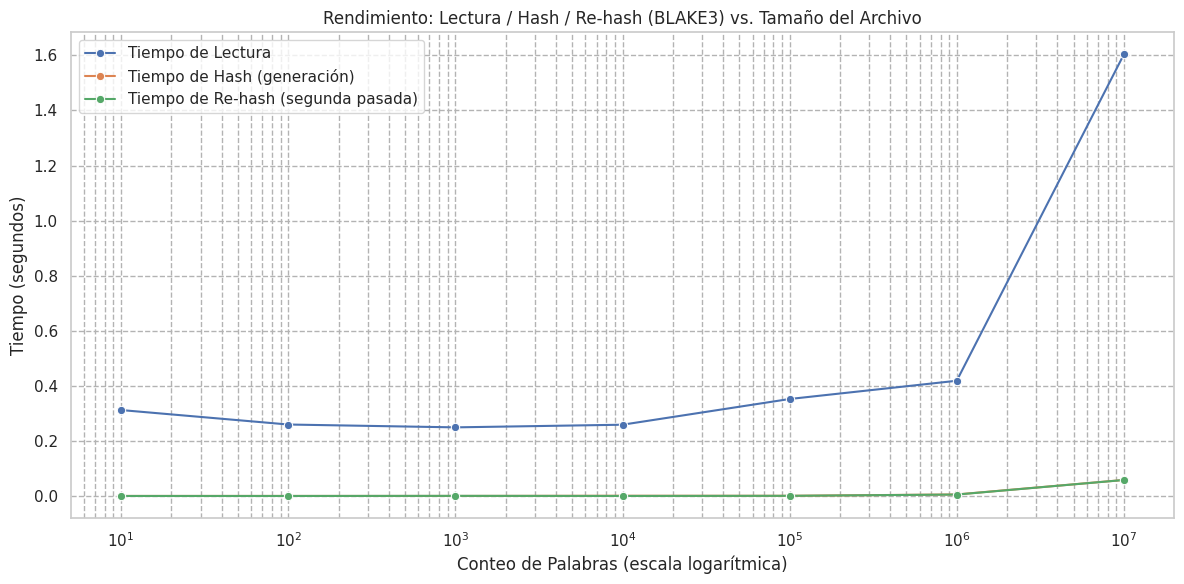

In [19]:
#Gráfica de rendimiento: read_time, encrypt_time (hash), decrypt_time (rehash)
sns.set(style="whitegrid")

# Convertimos word_count a escala numérica (asegurarnos tipo int)
df_hash['word_count'] = df_hash['word_count'].astype(int)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_hash, x='word_count', y='read_time', label='Tiempo de Lectura', marker='o')
sns.lineplot(data=df_hash, x='word_count', y='encrypt_time', label='Tiempo de Hash (generación)', marker='o')
sns.lineplot(data=df_hash, x='word_count', y='decrypt_time', label='Tiempo de Re-hash (segunda pasada)', marker='o')

plt.xscale('log')
plt.title('Rendimiento: Lectura / Hash / Re-hash (BLAKE3) vs. Tamaño del Archivo')
plt.xlabel('Conteo de Palabras (escala logarítmica)')
plt.ylabel('Tiempo (segundos)')
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()

## Bibliografia

[1] J. O’Connor, J. Albrecht, S. Aumasson and S. Nathan, “BLAKE3: One Function, Fast Everywhere,” 2020. Available: https://github.com/BLAKE3-team/BLAKE3-spec/blob/master/blake3.pdf

[2] R. C. Merkle, “A digital signature based on a conventional encryption function,” in Advances in Cryptology – CRYPTO '87, Lecture Notes in Computer Science, vol. 293, Springer, 1988, pp. 369–378.

[3] C. D. Manning and K. Rohloff, "Analyzing performance and parallelism in modern hash functions,” MIT Lincoln Laboratory, Tech. Rep., 2021.

[4] Google, "Colaboratory," Google. [Online]. Available: https://colab.research.google.com/. [Accessed: 30-oct-2025].